In [1]:
import numpy as np
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# İlk 5 satırı görüntüle
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
# Eksik değer yüzdesi hesaplama
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(train)) * 100

# Sadece eksik değeri olan değişkenleri listeleyelim
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]

# Eksik değerlerin yüzdesini görüntüle
missing_data

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [4]:
# Eksik verileri doldurma

# "None" veya "Bilinmiyor" olarak doldurulacak kategorik değişkenler
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for col in none_cols:
    train[col] = train[col].fillna("None")

# Sayısal değişkenleri sıfır ile doldurma
zero_cols = ['MasVnrArea', 'GarageYrBlt']
for col in zero_cols:
    train[col] = train[col].fillna(0)

# LotFrontage için mahalle bazlı ortalama ile doldurma
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Electrical değişkeni için en sık kullanılan değeri atama
train["Electrical"] = train["Electrical"].fillna(train["Electrical"].mode()[0])

# Eksik veri olup olmadığını tekrar kontrol etme
train.isnull().sum().sum()


0

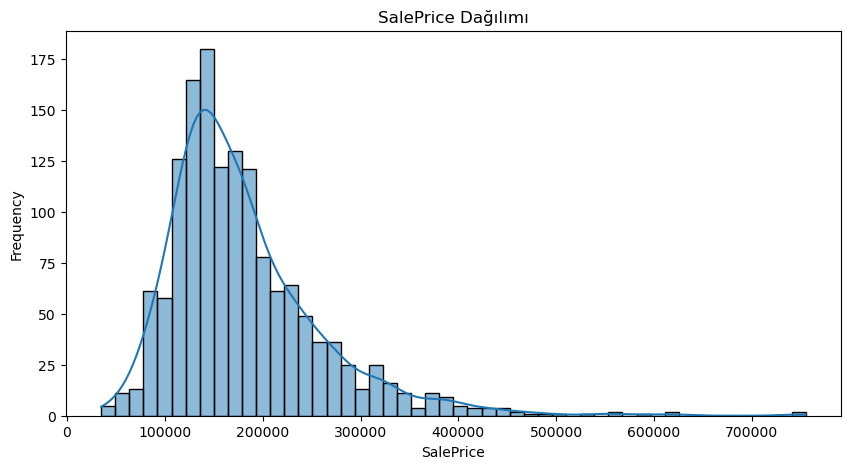

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram ile dağılımı inceleyelim
plt.figure(figsize=(10,5))
sns.histplot(train["SalePrice"], bins=50, kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("SalePrice Dağılımı")
plt.show()


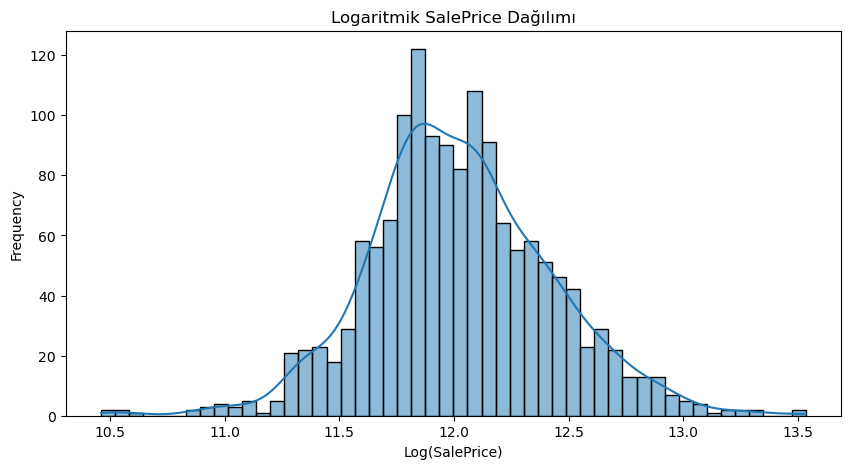

In [6]:
# Log dönüşümü Hedef değişkenin çarpıklığını düzeltmek için logaritmik dönüşüm yapalım.
train["SalePrice"] = np.log1p(train["SalePrice"])

# Yeni histogramı çizelim
plt.figure(figsize=(10,5))
sns.histplot(train["SalePrice"], bins=50, kde=True)
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.title("Logaritmik SalePrice Dağılımı")
plt.show()

In [7]:
from sklearn import linear_model
import matplotlib.pyplot as plt

# Sadece sayısal değişkenleri seçelim
numeric_features = train.select_dtypes(include=[np.number])

# Korelasyon matrisini tekrar hesaplayalım
corr_matrix = numeric_features.corr()

# SalePrice ile en yüksek korelasyona sahip ilk 10 değişken
corr_with_target = corr_matrix["SalePrice"].sort_values(ascending=False)
corr_with_target.head(10)           

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64

In [30]:

"""
test dosyası içerisinde bağımlı değişkenin yani etiketin sonuçları olmadığı için

from sklearn.metrics import r2_score

# Test veri setinde bağımsız değişkenleri kullanarak tahmin yap
y_pred = reg.predict(test[['OverallQual']])

# Gerçek değerleri test veri setinden al
y_true = test['SalePrice']

# R² skorunu hesapla (modelin başarım yüzdesi)
r2 = r2_score(y_true, y_pred)

print(f"Modelin başarım yüzdesi (R² skoru): {r2 * 100:.2f}%")
"""
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Veriyi eğitim ve test setlerine ayır
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

# Kullanılacak özellikleri belirle
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

# Polinomal özellikler oluştur (2. derece polinom)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(train_set[features])
X_test_poly = poly.transform(test_set[features])

# Polinomal regresyon modelini oluştur ve eğit
reg = LinearRegression()
reg.fit(X_train_poly, train_set['SalePrice'])

# Tahmin yap
y_pred = reg.predict(X_test_poly)
y_true = test_set['SalePrice']

# R² skorunu hesapla
r2 = r2_score(y_true, y_pred)
print(f"Polinomal Regresyon Modelinin Başarım Yüzdesi (R² skoru): {r2 * 100:.2f}%")

Polinomal Regresyon Modelinin Başarım Yüzdesi (R² skoru): 82.65%
